# Day 6 – IMDB Movie Reviews Analysis (Text & Ratings)

## Objective
To analyze movie reviews by exploring rating distributions, textual patterns, and relationships between review length and ratings.

Dataset Link:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

sns.set_theme(style="whitegrid")

## Step 2: Load Dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Step 3: Clean Column Names

In [3]:
df.columns = (
    df.columns.str.lower().str.strip().str.replace(" ", "_")
)
df.columns

Index(['review', 'sentiment'], dtype='object')

## Step 4: Basic Data Cleaning

In [4]:
df = df.dropna(subset=["review", "sentiment"])

df["rating"] = df["sentiment"].map({"positive": 8, "negative": 3})

## Step 5: Rating Distribution

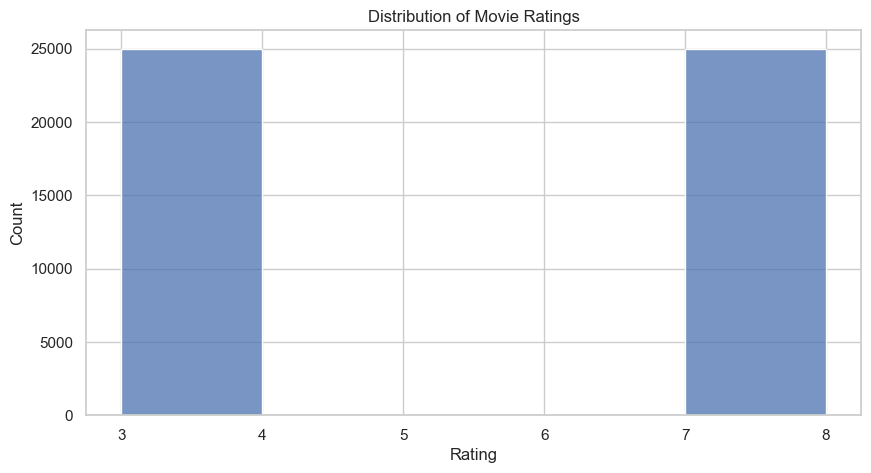

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["rating"], bins=5)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Step 6: Review Length Analysis

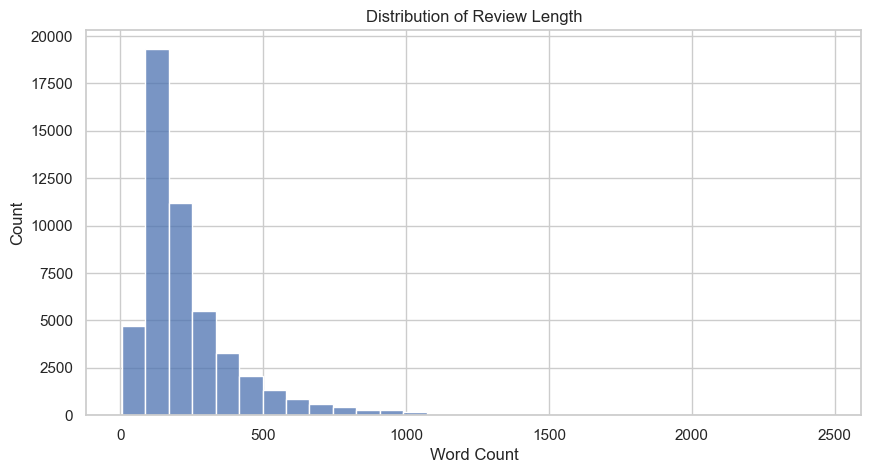

In [6]:
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df["review_length"], bins=30)
plt.title("Distribution of Review Length")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()

## Step 7: Review Length vs Rating

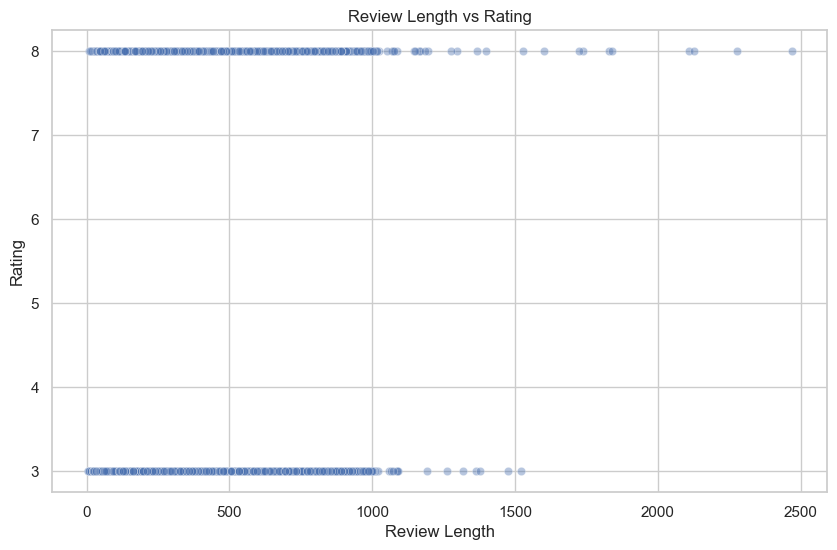

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="review_length", y="rating", alpha=0.4)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()

## Step 8: Text Cleaning

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_review"] = df["review"].apply(clean_text)

## Step 9: Common Words Analysis

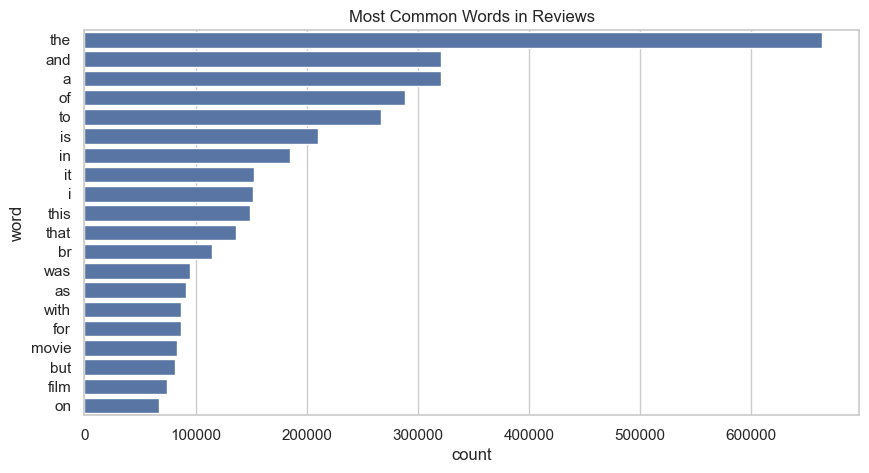

In [9]:
all_words = " ".join(df["clean_review"]).split()
common_words = Counter(all_words).most_common(20)

common_df = pd.DataFrame(common_words, columns=["word", "count"])

plt.figure(figsize=(10,5))
sns.barplot(data=common_df, x="count", y="word")
plt.title("Most Common Words in Reviews")
plt.show()

## Conclusion

This analysis highlights the importance of combining numerical ratings with textual reviews to better understand user sentiment. While ratings summarize opinions, review text provides context and nuance that numbers alone cannot capture.

By analyzing review length and common language patterns, we gain deeper insight into how users express strong positive and negative opinions. This approach is especially useful for platforms that rely on user feedback to guide recommendations and product improvements.
